In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("/home/naoya/kaggle/czii/input/czii-cryo-et-object-identification/train/overlay/Particles.csv")
df.head()

,pickable_object_name,user_id,session_id,run_name,voxel_spacing,unit,points,trust_orientation,x,y,z,transformation_,instance_id
0,apo-ferritin,curation,0,TS_5_4,NaN,angstrom,"{'location': {'x': 468.514, 'y': 5915.906, 'z'...",True,468.514,5915.906,604.167,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",0
1,apo-ferritin,curation,0,TS_5_4,NaN,angstrom,"{'location': {'x': 5674.694, 'y': 1114.354, 'z...",True,5674.694,1114.354,565.068,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",0
2,apo-ferritin,curation,0,TS_5_4,NaN,angstrom,"{'location': {'x': 5744.509, 'y': 1049.172, 'z...",True,5744.509,1049.172,653.712,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",0
3,apo-ferritin,curation,0,TS_5_4,NaN,angstrom,"{'location': {'x': 5880.769, 'y': 1125.348, 'z...",True,5880.769,1125.348,579.560,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",0
4,apo-ferritin,curation,0,TS_5_4,NaN,angstrom,"{'location': {'x': 4661.667, 'y': 1269.497, 'z...",True,4661.667,1269.497,810.409,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",0


,pickable_object_name,user_id,session_id,run_name,voxel_spacing,unit,points,trust_orientation,x,y,z,transformation_,instance_id,cluster
0,apo-ferritin,curation,0,TS_5_4,NaN,angstrom,"{'location': {'x': 468.514, 'y': 5915.906, 'z'...",True,468.514,5915.906,604.167,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",0,2
1,apo-ferritin,curation,0,TS_5_4,NaN,angstrom,"{'location': {'x': 5674.694, 'y': 1114.354, 'z...",True,5674.694,1114.354,565.068,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",0,1
2,apo-ferritin,curation,0,TS_5_4,NaN,angstrom,"{'location': {'x': 5744.509, 'y': 1049.172, 'z...",True,5744.509,1049.172,653.712,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",0,1
3,apo-ferritin,curation,0,TS_5_4,NaN,angstrom,"{'location': {'x': 5880.769, 'y': 1125.348, 'z...",True,5880.769,1125.348,579.560,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",0,1
4,apo-ferritin,curation,0,TS_5_4,NaN,angstrom,"{'location': {'x': 4661.667, 'y': 1269.497, 'z...",True,4661.667,1269.497,810.409,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...",0,1


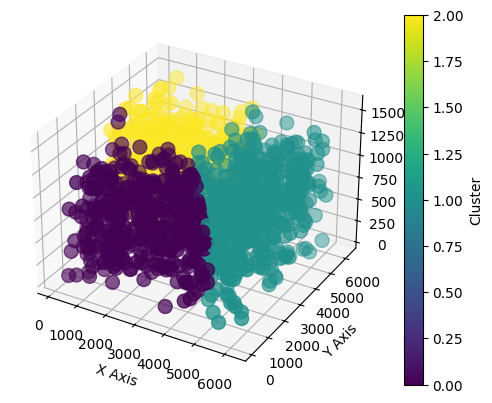

In [4]:
# KMeans クラスタリング
kmeans = KMeans(n_clusters=3, random_state=0)
df["cluster"] = kmeans.fit_predict(df[["x", "y", "z"]])

display(df.head())

# 3Dプロットでクラスタリング可視化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df["x"], df["y"], df["z"], c=df["cluster"], cmap='viridis', s=100)

ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
plt.colorbar(scatter, ax=ax, label="Cluster")
plt.show()

In [5]:
import numpy as np

# 各 pickable_object_name の中心座標を計算
centroids = df.groupby("pickable_object_name")[["x", "y", "z"]].mean()

# 距離行列を計算
from scipy.spatial.distance import pdist, squareform
distances = pd.DataFrame(
    squareform(pdist(centroids)),
    index=centroids.index,
    columns=centroids.index
)

print("中心間の距離:")
print(distances)

中心間の距離:
pickable_object_name  apo-ferritin  beta-amylase  beta-galactosidase  \
pickable_object_name                                                   
apo-ferritin              0.000000    452.666003          543.308135   
beta-amylase            452.666003      0.000000          272.096603   
beta-galactosidase      543.308135    272.096603            0.000000   
ribosome                319.250009    467.903805          480.803505   
thyroglobulin           344.969075    128.063315          258.261410   
virus-like-particle     283.130523    438.716528          396.379514   

pickable_object_name    ribosome  thyroglobulin  virus-like-particle  
pickable_object_name                                                  
apo-ferritin          319.250009     344.969075           283.130523  
beta-amylase          467.903805     128.063315           438.716528  
beta-galactosidase    480.803505     258.261410           396.379514  
ribosome                0.000000     351.647198           15

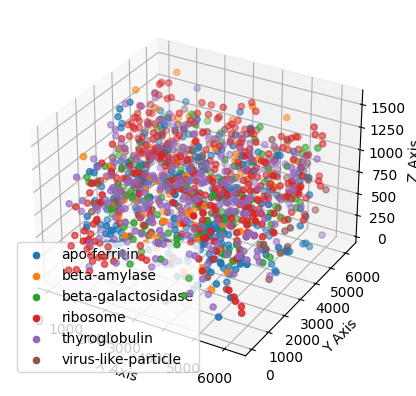

In [6]:
# 3D プロット
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 各カテゴリに色を付けて表示
for name, group in df.groupby("pickable_object_name"):
    ax.scatter(group["x"], group["y"], group["z"], label=name)

ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
plt.legend()
plt.show()